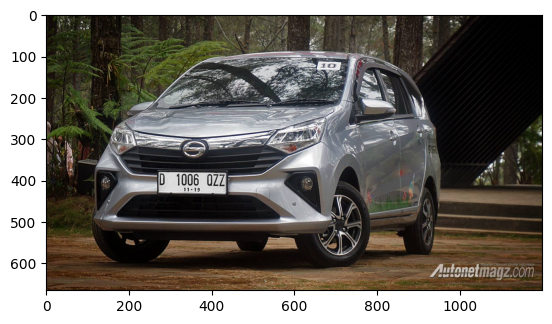

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
filename = "plat_indo.jpg"
car_img = cv2.imread(filename)
car_img=cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
plt.imshow(car_img)

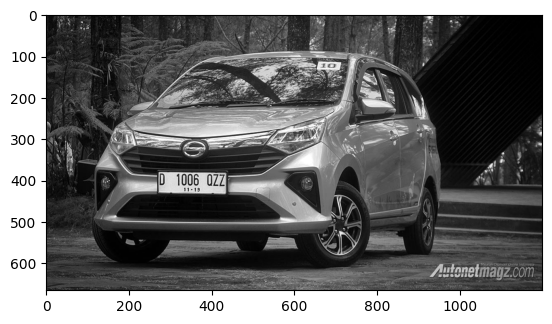

In [3]:
gray = cv2.cvtColor(car_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

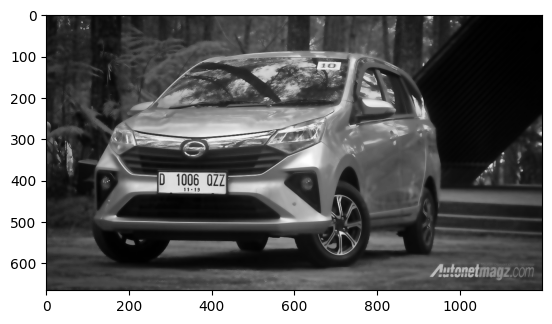

In [4]:
blurred_gray = cv2.bilateralFilter(gray, 10, 50, 50)
plt.imshow(blurred_gray, cmap='gray', vmin=0, vmax=255)

(666, 1200)


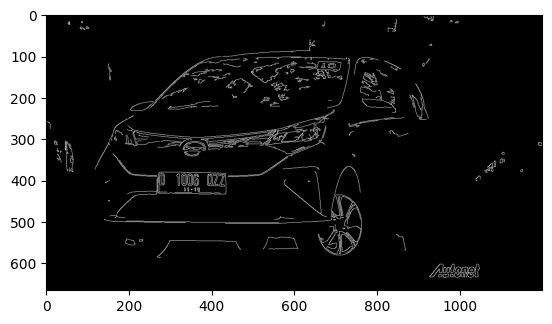

In [5]:
edged = cv2.Canny(blurred_gray, 500, 150) 
print(edged.shape)
plt.imshow(edged, cmap='gray', vmin=0, vmax=255)

In [9]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

contours = sorted(contours,key=cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    print(peri)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    print(approx)
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(car_img, [screenCnt], -1, (0, 0, 255), 2)
    
    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(car_img,car_img,mask=mask)
    plt.imshow(new_image)

271.58073377609253
[[[656 137]]

 [[674 134]]

 [[686 153]]

 [[684 139]]

 [[675 135]]

 [[702 138]]

 [[714 118]]

 [[660 114]]]
177.01219260692596
[[[655 133]]

 [[660 114]]

 [[714 118]]

 [[708 135]]

 [[694 134]]

 [[704 134]]

 [[701 138]]]
119.84061932563782
[[[699 439]]

 [[695 446]]

 [[690 477]]

 [[702 486]]

 [[710 486]]

 [[703 441]]]
115.84062016010284
[[[699 439]]

 [[703 441]]

 [[710 476]]

 [[709 486]]

 [[703 486]]

 [[690 474]]

 [[695 446]]]
3310.2135392427444
[[[753 392]]

 [[711 494]]

 [[433 505]]

 [[721 440]]

 [[722 580]]

 [[658 531]]

 [[750 558]]]
2831.616435647011
[[[697 230]]

 [[197 267]]

 [[545 280]]

 [[419 326]]]
114.81118249893188
[[[960 603]]

 [[952 603]]

 [[928 634]]

 [[936 634]]

 [[950 617]]

 [[951 623]]

 [[958 623]]]
117.29646337032318
[[[961 605]]

 [[957 623]]

 [[951 622]]

 [[950 615]]

 [[935 634]]

 [[928 633]]

 [[953 603]]]
76.72792184352875
[[[275 384]]

 [[274 411]]

 [[283 412]]

 [[287 406]]

 [[286 388]]

 [[284 385]]]
74.97